# Week Four Part 2

Ari and Lucas

Our assignment for Week 4 is on high frequency words.

1. Choose a corpus of interest.
For our corpus to conduct this analysis, we will use Gutenberg corpus from the NLTK built-in corpora. Since this corpus has over 25,000 books in it, we decided to focus on all the Shakespeare works in the corpus. This resulted in 3 works being used: Caesar, Hamlet, & Macbeth.

In [2]:
import nltk
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download('gutenberg')

#the 3 shakespeare files in Gutenberg
shakespeare_files = ['shakespeare-caesar.txt',
                     'shakespeare-hamlet.txt',
                     'shakespeare-macbeth.txt']

# Combine all words from the 3 texts
corpus_words = []
for file in shakespeare_files:
    corpus_words += list(gutenberg.words(file))

print(f"Total words in all Shakespeare texts: {len(corpus_words)}")


[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


Total words in all Shakespeare texts: 86333


2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).

To get a total unique words, we fiirst made every word lowercase so that we do not get How and how. We also got rid of punctuation. This is our interesting and defensible way of defining unique words. Clean and simple words. After doing this and getting rid of dupes, the total number of words decreased by aroung 17,000. This will make the rest of the work more accurate.

In [26]:
from enum import unique
words = [w.lower() for w in corpus_words if w.isalpha()]
unique_words = set(words)

print(f"Total words after lowercase and punctuation changes: {len(words)}")
print(f"Total unique words: {len(unique_words)}")

Total words after lowercase and punctuation changes: 69340
Total unique words: 7541


3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In order to do this we first need to make a list of words and their frequency count to create the sorted list, sorted_word_count. We then used a for loop that will keep adding unique words until the word count from these is greater than or equal to half of the total words. Then, the for loop will break.

Interestingly, it only took 81 words to make up 50% of the total words in the corpus. That is 81 out of 7541! We were expecting a low number but this is extremely low! It makes sense as a lot of these words are very common words that are used in every sentence like 'the', 'a', 'i', 'you', and in Shakespeare's case, 'hath', 'thou', etc.

In the next section, we printed out this list of words and more so we did not bother to here.

In [34]:
from collections import Counter

#create a word frequency counter
word_freq = Counter(words)

#sort words by commonness or frequency
sorted_word_counts = word_freq.most_common()

#for loop until 50% of total words are represented
unique_word_count = 0
represented_words_count = 0
represented_words = []

for word, count in sorted_word_counts:
    unique_word_count += 1
    represented_words_count += count
    represented_words += [word]
    if represented_words_count >= len(words) / 2:
        break

print(f"Unique words that make up 50% of the corpus: {unique_word_count}")

Unique words that make up 50% of the corpus: 81
34709


4. Identify the 200 highest frequency words in this corpus.

Here we got the 200 words with the highest frequency from the sorted_word_count we created in #3.

In [28]:
highest_200 = sorted_word_counts[:200]

print("The 200 highest frequency words & their count:")
for word, count in highest_200:
    print("{:<10}{}".format(word, count))

The 200 highest frequency words & their count:
the       2222
and       2036
to        1515
i         1455
of        1302
you       1124
a         1019
my        914
that      904
in        826
it        778
is        769
not       722
d         662
his       588
with      557
this      546
for       533
me        529
your      528
but       510
he        491
be        476
what      458
haue      448
him       434
as        427
so        424
will      384
our       346
ham       337
all       321
thou      312
we        306
are       305
s         303
shall     300
no        297
lord      293
do        287
then      278
on        276
by        256
if        243
come      232
king      231
enter     230
they      225
good      218
let       217
now       208
thy       202
was       200
there     199
caesar    193
from      193
at        192
which     187
did       187
vs        184
or        184
know      176
o         176
them      175
more      174
thee      174
their     171
would   

5. Create a graph that shows the relative frequency of these 200 words.

Below is a bar graph to show the relative frequency of these 200 words. Relative frequency is the word's count divided by total words in the corpus so the percentage of occurences that word makes in the whole 3 Shakespeare works.

i.e. 'the' -> 2222/69340 ~= 0.032 or 3.2%

The graph is a bit hard to read with all 200 words but we can see that even the highest of the highest does not make that big of a percentage of the corpus. This makes the fact that it only took 81 words to make up 50% of the corpus a bit crazy to me.

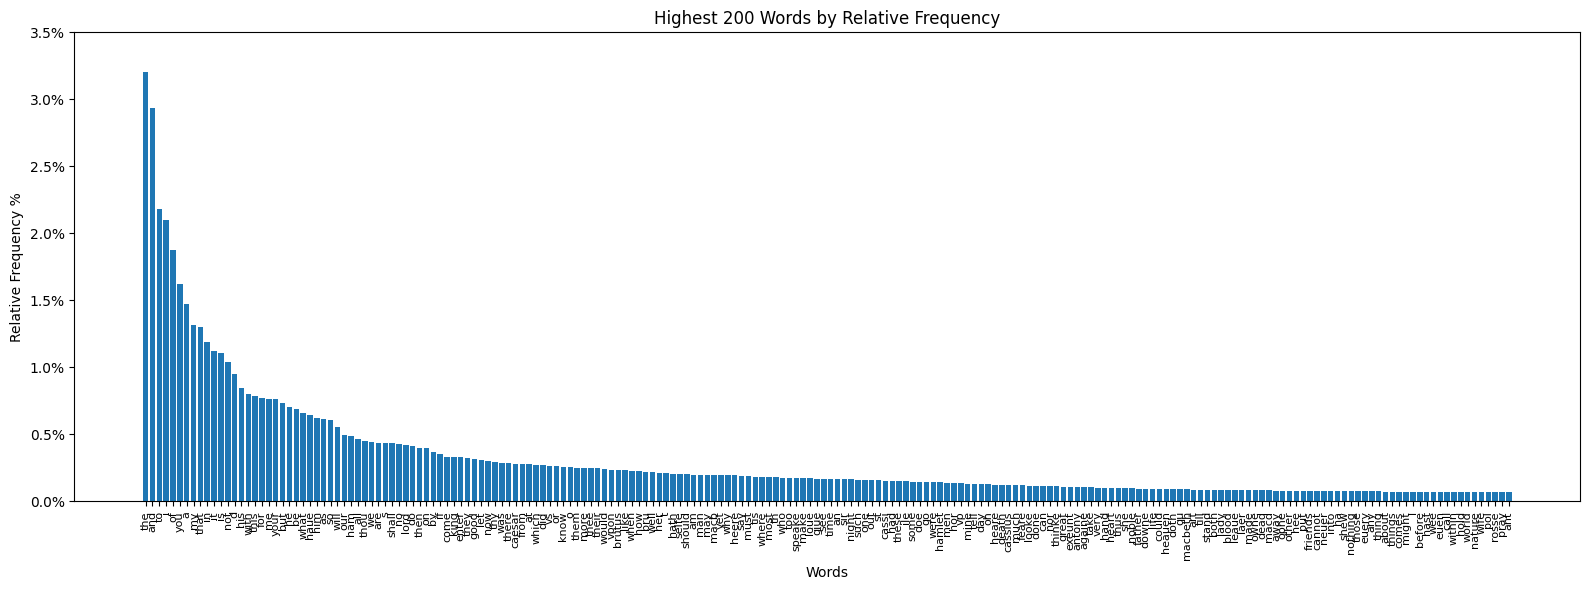

In [36]:
import matplotlib.pyplot as plt

#set ups
highest_200_with_rel = [(word, count, (count/len(words))*100) for word, count in highest_200]
highest_200_words = [w for w, c, r in highest_200_with_rel]
highest_200_rel = [r for w, c, r in highest_200_with_rel]

#plot
plt.figure(figsize=(16, 6))
plt.bar(range(len(highest_200_words)), highest_200_rel, tick_label=highest_200_words)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(plt.yticks()[0], [f"{t:.1f}%" for t in plt.yticks()[0]])
plt.xlabel("Words")
plt.ylabel("Relative Frequency %")
plt.title("Highest 200 Words by Relative Frequency")
plt.tight_layout()
plt.show()

6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

First, Zipf's law is a patterned law about the relationship of the frequent words in the corpus. Basically, it states that the 1st frequency/most frequent word will appear twice as much as the 2nd frequency/most frequent word.

Based on this defintion, the above observed relative frequency of these words does NOT follow Zipf's law. Just from looking at the graph, the differences in the bars are not big enough to be half of the previous one. At a closer look, the 1st word is 'the' with a relative frequency of 3.2% and the 2nd word is 'and' with a relative frequency of 2.936%. The 2nd word is NOT half of the 1st word.

7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

I think the frequency of the words in this corpus will be very different from “all words in all corpora." This corpus should always have higher frequencies as it is a very specific and small pool of examples/works with three factors leading it to this unlike a “all words in all corpora” that will, in theory, have every word of all time in it. This corpus is filled up of plays in a specific era from a specific author. Shakespeare will be only using words from his time and people tend to use the same words they normally use over and over again. Also in writing, we have function words like 'the' and 'and' that are necessary for sentence structure so they will more than likely be in top frequences like they are here.

In conclusion, this corpus’s unique context and setting makes its word frequency distribution more distinct than a more generalized distribution from “all words in all corpora" would be.